In [ ]:
!pip install newspaper3k
!pip install textblob

import newspaper
from newspaper import Article
import pandas as pd
from textblob import TextBlob

def extract_text_from_article(url):
    article = newspaper.Article(url)
    article.download()
    article.parse()
    return article.text

# Define URLs for articles
urls = [
    'https://www.cnnindonesia.com/olahraga/20230612061855-142-960496/memahat-megarekor-timnas-indonesia-dan-anti-inferior-argentina/amp',
    'https://www.bolasport.com/amp/read/313809587/timnas-argentina-bakal-mainkan-skuad-pelapis-saat-hadapi-timnas-indonesia-sinyal-lionel-messi-tak-datang-menguat',
    'https://www.bola.net/amp/tim_nasional/loh-loh-loh-lionel-messi-batal-ikut-rombongan-timnas-argentina-ke-indonesia-7a6258.html',
    'https://www.cnnindonesia.com/olahraga/20230612081940-142-960518/reaksi-netizen-soal-isu-argentina-akan-rotasi-pemain-lawan-indonesia/amp',
    'https://mamagini.suara.com/amp/read/2023/06/09/142338/cek-fakta-tolak-argentina-main-dengan-indonesia-anies-baswedan-dipermalukan-di-depan-publik',
    'https://www.kompas.tv/amp/video/415279/laga-vs-palestina-dan-argentina-sebentar-lagi-timnas-indonesia-berlatih-perkuat-fisik',
    'https://www.sportstars.id/amp/malaysia-soroti-penjualan-tiket-timnas-indonesia-vs-argentina-yang-ludes-hitungan-menit-3wSZ83',
    'https://inet.detik.com/cyberlife/d-6767375/laga-indonesia-vs-argentina-tanpa-messi-ibarat-sayur-tanpa-garam-hambar/amp',
    'https://www.antvklik.com/amp/olahraga/591156-kecewa-timnas-argentina-disebut-bakal-turunkan-skuad-lapis-kedua-lawan-indonesia',
    # 'https://bola.okezone.com/amp/2023/06/12/51/2829119/media-argentina-sebut-penyebab-lionel-messi-absen-di-laga-timnas-indonesia-vs-argentina',
    'https://www.cnbcindonesia.com/news/20230611151017-4-444922/isu-messi-batal-datang-warganet-jual-tiket-ri-argentina/amp',
    'https://www.bola.net/amp/tim_nasional/duh-usai-messi-disebut-bakal-absen-kini-timnas-argentina-dikabarkan-akan-lakukan-rotasi-pemai-202511.html',
    'https://deli.suara.com/amp/read/2023/06/12/084438/kabar-buruk-lionel-messi-ogah-lawan-timnas-indonesia-argentina-turunkan-pelapis',
    'https://www.bolasport.com/amp/read/313809732/tidak-ikut-skuad-argentina-lionel-messi-pilih-liburan-ketimbang-lawan-timnas-indonesia',
    'https://palembang.tribunnews.com/amp/2023/06/12/sinyal-lionel-messi-tidak-main-lawan-timnas-indonesia-kian-menguat-argentina-turunkan-skuad-pelapis',
    'https://www.bolanusantara.com/timnas/amp/5539107637/julian-alvarez-siap-gantikan-sosok-lionel-messi-saat-argentina-tantang-timnas-indonesia',
    # 'https://bola.okezone.com/amp/2023/06/11/51/2828952/penyebab-timnas-argentina-dikabarkan-bakal-turunkan-pemain-pelapis-lawan-timnas-indonesia',
    'https://jakarta.tribunnews.com/amp/2023/06/12/viral-argentina-bakal-pakai-pemain-lapis-kedua-lawan-timnas-indonesia-asnawi-gagal-tekel-messi',
    'https://www.bola.com/amp/5316267/harapan-agar-lionel-messi-ikut-rombongan-timnas-argentina-ke-indonesia-dan-berkunjung-ke-bali',
    'https://www.suara.com/video/2023/06/12/070000/jelang-lawan-timnas-indonesia-pelatih-argentina-bilang-begini',
    'https://www.bolanusantara.com/timnas/amp/5539104691/waduh-timnas-argentina-dikabarkan-tidak-menurunkan-skuat-piala-dunia-2022-saat-melawan-indonesia',
    # 'https://bola.okezone.com/amp/2023/06/11/51/2828853/perempuan-cantik-kamboja-batal-nonton-laga-timnas-indonesia-vs-argentina-saya-sangat-menyesal',
    'https://garut.suara.com/amp/read/2023/06/12/060000/jelang-laga-indonesia-vs-argentina-komentar-kocak-bermunculan-netizen-kapan-lagi-ngeliat-indonesia-bantai-juara-piala-dunia',
    'https://www.cnnindonesia.com/olahraga/20230609114745-142-959715/pemain-timnas-indonesia-belum-kumpul-persiapan-argentina-mepet/amp',
    'https://m.kumparan.com/amp/kumparanbola/timnas-argentina-diklaim-kantongi-rp-96-7-m-dari-lawan-indonesia-and-australia-20a3hSfJlsN',
    'https://www.harianhaluan.com/sport/amp/109106573/argentina-hanya-siapkan-tim-pelapis-messi-ke-indonesia-cuma-prank-aja',
    'https://www.cnnindonesia.com/olahraga/20230609075955-142-959606/pesan-emosional-elkan-baggott-jelang-indonesia-vs-argentina/amp',
    'https://www.batastimor.com/nasional/amp/8059108839/fifa-match-day-indonesia-vs-argentina-didukung-bri-perputaran-ekonomi-berpotensi-naik',
    'https://www.radardepok.com/metropolis/amp/9469106227/yakin-timnas-indonesia-menang-lawan-argentina-ini-prediksi-bos-persikad-1999',
    'https://www.sportstars.id/amp/kabar-buruk-lionel-messi-dikabarkan-batal-perkuat-timnas-argentina-ke-indonesia-pada-fifa-matchday-lLJ444',
    'https://www.kompasiana.com/amp/ilhamfaisal/648655224d498a461903b064/jika-messi-dan-bintang-absen-di-gbk-mungkin-argentina-sudah-pelajari-indonesia',
    'https://www.bolanusantara.com/timnas/amp/5539105508/reaksi-netizen-indonesia-saat-tahu-argentina-turunkan-tim-lapis-kedua-waktunya-kita-bantai-mereka',
    'https://m.jpnn.com/amp/news/dukung-laga-timnas-indonesia-vs-argentina-ratusan-warga-ternate-melakukan-ini',
    'https://www.genpi.co/amp/sport/221477/jelang-lawan-palestina-dan-argentina-timnas-indonesia-dapat-motivasi-mental',
    'https://kalteng.tribunnews.com/amp/2023/06/11/sandy-walsh-gagal-debut-di-laga-timnas-indonesia-vs-argentina-janjikan-ini-kepada-supporter',
    'https://manado.tribunnews.com/amp/2023/06/12/kabar-terkini-soal-fifa-matchday-argentina-disebut-turunkan-pemain-pelapis-saat-melawan-indonesia',
    'https://www.bolanusantara.com/timnas/amp/5539103669/inikah-2-faktor-penyebab-bintang-argentina-lionel-messi-batal-ke-indonesia',
    'https://www.bola.com/indonesia/read/5314682/timnas-indonesia-vs-argentina-ipswich-town-ulas-kemungkinan-elkan-baggott-menghadapi-lionel-messi',
    'https://bandung.suara.com/read/2023/06/12/060000/lionel-messi-diisukan-batal-datang-bersama-timnas-argentina-ke-indonesia-netizen-calo-ketar-ketir',
    'https://linimasa.suara.com/read/2023/06/11/200823/lionel-messi-dikabarkan-batal-ke-indonesia-perkuat-timnas-argentina-ketahui-penyebabnya',
    'https://www.bolasport.com/read/313809049/messi-batal-main-di-indonesia-5-pemain-argentina-ini-tetap-seru-untuk-ditonton',
    'https://www.cnnindonesia.com/olahraga/20230612022108-142-960481/lawan-indonesia-argentina-disebut-bakal-simpan-pemain-bintang',
    'https://sport.detik.com/sepakbola/liga-indonesia/d-6767028/indonesia-vs-argentina-ini-yang-bakal-dilakukan-elkan-baggott',
    'https://www.kompas.com/sports/read/2023/06/11/06213228/timnas-indonesia-vs-argentina-messi-masuk-skuad-disebut-tak-ikut-rombongan',
    'https://www.bola.net/tim_nasional/timnas-indonesia-vs-argentina-info-jadwal-pertandingan-stadion-harga-tiket-dan-siaran-langsun-07ac63.html',
    'https://ntt.pikiran-rakyat.com/olahraga/pr-2326769237/lionel-messi-batal-datang-netizen-ramai-over-tiket-indonesia-vs-argentina',
    'https://www.libero.id/detail/25224/catat-jadwal-siaran-langsung-timnas-indonesia-vs-timnas-argentina-1-1.html',
    'https://www.floreseditorial.com/news/3979108733/di-dukung-bri-potensi-perputaran-ekonomi-fifa-match-day-indonesia-vs-argentina-diproyeksi-tembus-rp500-miliar',
    'https://wow.tribunnews.com/2023/06/11/live-streaming-timnas-indonesia-vs-argentina-lionel-messi-tak-main-scaloni-akan-turunkan-pelapis',
    'https://www.viva.co.id/bola/bola-sejagat/1608212-fantastis-segini-uang-yang-diterima-argentina-dari-tur-china-dan-indonesia',
    'https://www.sportstars.id/read/simak-jadwal-dan-panduan-penukaran-tiket-timnas-indonesia-vs-argentina-E83VN4',
    # 'https://nasional.okezone.com/read/2023/06/11/337/2828949/effendi-syahputra-sarankan-erick-thohir-lobi-argentina-ajak-messi-terbang-ke-indonesia',
    'https://bolaskor.com/post/read/argentina-bakal-turunkan-susunan-pemain-berbeda-kontra-australia-dan-indonesia',
    'https://mamagini.suara.com/read/2023/06/11/182713/cek-fakta-tolak-pertandingan-argentina-vs-indonesia-anies-baswedan-berakhir-dipermalukan-erick-thohir-benarkah',
    'https://www.cnnindonesia.com/olahraga/20230611004047-142-960208/sumardji-masih-berharap-sandy-walsh-main-di-indonesia-vs-argentina',
    'https://cianjur.suara.com/read/2023/06/12/083000/argentina-turunkan-tim-pelapis-dalam-fifa-matchday-lawan-indonesia-netizen-geram',
    'https://www.harianhaluan.com/news/109106000/makin-kacau-pelatih-argentina-dikabarkan-bakal-turunkan-tim-lapis-2-untuk-lawan-timnas-indonesia',
    'https://www.cnnindonesia.com/olahraga/20230607140625-142-958778/skuad-argentina-bakal-pincang-lawan-timnas-indonesia',
    'https://www.cnnindonesia.com/olahraga/20230606121125-142-958178/ludes-2-menit-tiket-indonesia-vs-argentina-sold-out-di-hari-kedua/amp',
    'https://fajar.co.id/2023/06/11/ramai-jual-lagi-tiket-indonesia-vs-argentina-karena-messi-batal-hadir-pengamat-sangat-menurunkan-atensi-para-penonton/',
    'https://www.kompas.tv/olahraga/415215/lionel-messi-disebut-tak-tampil-saat-indonesia-vs-argentina-refund-sempat-trending-di-twitter',
    'https://www.harianhaluan.com/sport/109106261/ada-sosok-shin-tae-yong-ketum-federasi-sepak-bola-argentina-ogah-remehkan-timnas-indonesia',
    'https://bola.tempo.co/amp/1736060/calon-penonton-timnas-indonesia-vs-argentina-siap-jual-tiketnya-jika-lionel-messi-tak-datang',
    'https://www.cnnindonesia.com/olahraga/20230609094055-142-959639/2-persiapan-utama-sty-untuk-pemain-indonesia-lawan-argentina',
    'https://tidore.pikiran-rakyat.com/daerah/pr-3006768071/dukung-pertandingan-indonesia-vs-argentina-ratusan-warga-di-ternate-maluku-utara-gelar-jalan-pagi-dan-zumba',
    'https://www.harianhaluan.com/sport/109105476/bonus-juara-sea-games-2023-ernando-ari-didapuk-jadi-kiper-timnas-indonesia-saat-lawan-argentina',
    'https://www.cnbcindonesia.com/lifestyle/20230606094900-33-443294/tiket-indonesia-vs-argentina-masih-ada-banyak-buka-jam-11',
    'https://inet.detik.com/cyberlife/d-6766873/harap-harap-cemas-netizen-jika-lionel-messi-gagal-ke-indonesia',
    'https://curupekspress.disway.id/read/650546/messi-batal-ke-indonesia-ini-ciutan-jurnalis-argentina',
    'https://voi.id/olahraga/286103/rumor-lionel-messi-batal-ke-indonesia-pssi-kami-menunggu-keterangan-resmi-federasi-sepak-bola-argentina',
    'https://makassar.tribunnews.com/2023/06/11/bernardo-tavares-doakan-indonesia-menang-lawan-argentina-dan-palestina',
    'https://www.cnnindonesia.com/olahraga/20230609084509-142-959618/lingard-pemain-indonesia-jangan-terpukau-dengan-argentina',
    'https://www.sportstars.id/amp/beda-dengan-sty-sumardji-sebut-sandy-walsh-masih-berpeluang-perkuat-timnas-indonesia-vs-argentina-7H64Rg#amp_tf=From%20%251%24s&aoh=16865403862709&referrer=https%3A%2F%2Fwww.google.com'
]

# Initialize empty lists to store article texts and sentiments
texts = []
sentiments = []

# Extract article texts and sentiments
for url in urls:
    text = extract_text_from_article(url)
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    texts.append(text)
    sentiments.append(sentiment)

# Create a DataFrame to store the data
data = pd.DataFrame({'Text': texts, 'Sentiment': sentiments})

# Split the data into positive and negative sentiment dataframes
positive_data = data[data['Sentiment'] > 0]
negative_data = data[data['Sentiment'] < 0]
neutral_data  = data[data['Sentiment'] == 0]

def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

# Create a dataframe to store the article data
data = []

# Extract text and perform sentiment analysis for each article
for url in urls:
    text = extract_text_from_article(url)
    sentiment = analyze_sentiment(text)
    data.append({'URL': url, 'Sentiment': sentiment})

# Create a pandas dataframe from the data
df = pd.DataFrame(data)

# Print the dataframe
print(df)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
                                                  URL Sentiment
0   https://www.cnnindonesia.com/olahraga/20230612...   neutral
1   https://www.bolasport.com/amp/read/313809587/t...  positive
2   https://www.bola.net/amp/tim_nasional/loh-loh-...   neutral
3   https://www.cnnindonesia.com/olahraga/20230612...  positive
4   https://mamagini.suara.com/amp/read/2023/06/09...  positive
..                                                ...       ...
64  https://curupekspress.disway.id/read/650546/me...  positive
65  https://voi.id/olahraga/286103/rumor-lionel-me...   neutral
66  https://makassar.tribunnews.com/2023/06/11/ber...  positive
67  https://www.cnnindonesia.com/olahraga/20230609...   neutral
68  https://www.sportstars.id/amp/beda-dengan-sty-...   neutral

[69 rows x 2 columns]


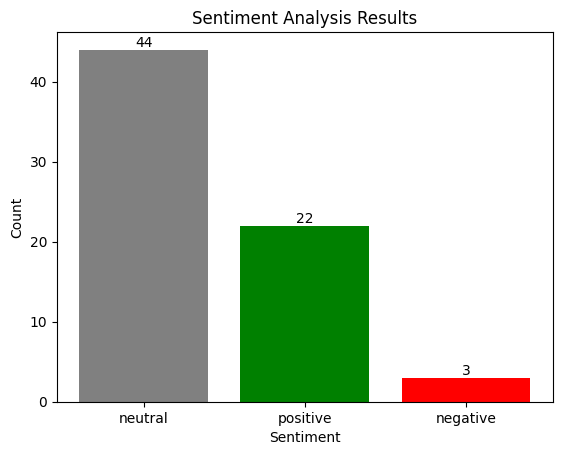

In [ ]:
import matplotlib.pyplot as plt

# Count the number of articles in each sentiment category
sentiment_counts = df['Sentiment'].value_counts()

# Create a bar graph
plt.bar(sentiment_counts.index, sentiment_counts.values, color =['gray', 'green', 'red'])

# Add labels and title to the graph
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')

# Add text labels to each bar
for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the graph
plt.show()

In [ ]:
# Save positive and negative sentiment dataframes to CSV files
positive_data.to_csv('positive_articles.csv', index=False)
negative_data.to_csv('negative_articles.csv', index=False)
neutral_data.to_csv('neutral_articles.csv', index=False)

# Download the CSV files
from google.colab import files
files.download('positive_articles.csv')
files.download('negative_articles.csv')
files.download('neutral_articles.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


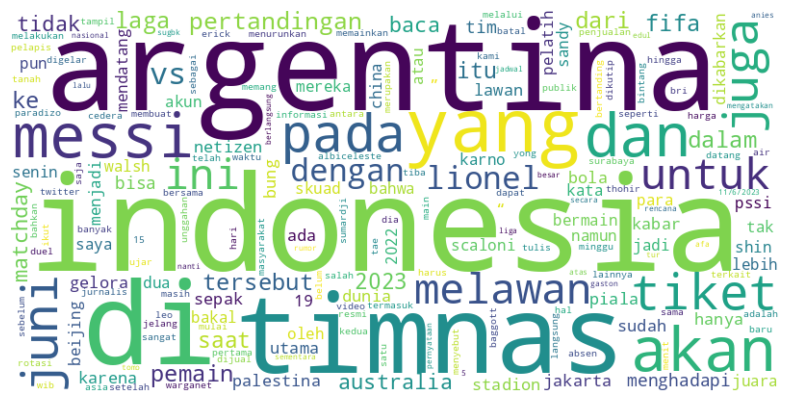

In [ ]:
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to extract text from articles
def extract_text_from_article(url):
    article = Article(url)
    article.download()
    article.parse()
    return article.text

# Extract text from URLs
article_texts = [extract_text_from_article(url) for url in urls]

# Combine all the text into a single string
combined_text = ' '.join(article_texts)

# Create a TextBlob object
blob = TextBlob(combined_text)

# Generate word frequencies
word_frequencies = blob.word_counts

# Generate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Plot the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
